## Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
### Dataset Description:
The dataset consists of the following variables:
* Age: Age in years
* KM: Accumulated Kilometers on odometer
* FuelType: Fuel Type (Petrol, Diesel, CNG)
* HP: Horse Power
* Automatic: Automatic ( (Yes=1, No=0)
* CC: Cylinder Volume in cubic centimeters
* Doors: Number of doors
* Weight: Weight in Kilograms
* Quarterly_Tax: 
* Price: Offer Price in EUROs
Tasks:
1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.
2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.
4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5. Apply Lasso and Ridge methods on the model.

### Interview Questions:
1. What is Normalization & Standardization and how is it helpful?
2. What techniques can be used to address multicollinearity in multiple linear regression?


Ensure to properly comment your code and provide explanations for your analysis.
Include any assumptions made during the analysis and discuss their implications.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [31]:


# Load the dataset
data = pd.read_csv('./ToyotaCorolla - MLR.csv')
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
print(data.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [5]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


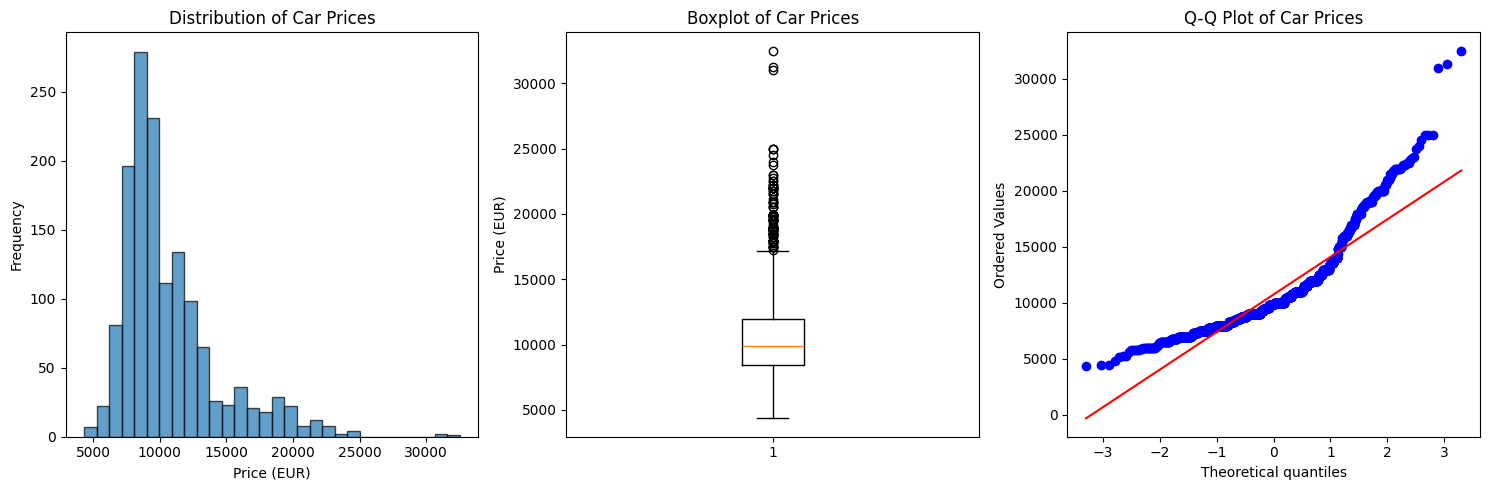

Price Statistics:
Mean: 10730.82
Median: 9900.00
Standard Deviation: 3626.96
Min: 4350.00
Max: 32500.00


In [6]:
# 1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(data['Price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (EUR)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(data['Price'])
plt.title('Boxplot of Car Prices')
plt.ylabel('Price (EUR)')

plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(data['Price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Car Prices')

plt.tight_layout()
plt.show()

print(f"Price Statistics:")
print(f"Mean: {data['Price'].mean():.2f}")
print(f"Median: {data['Price'].median():.2f}")
print(f"Standard Deviation: {data['Price'].std():.2f}")
print(f"Min: {data['Price'].min():.2f}")
print(f"Max: {data['Price'].max():.2f}")

In [7]:
# Fuel Type distribution
print("\nFuel Type Distribution:")
print(data['Fuel_Type'].value_counts())


Fuel Type Distribution:
Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64


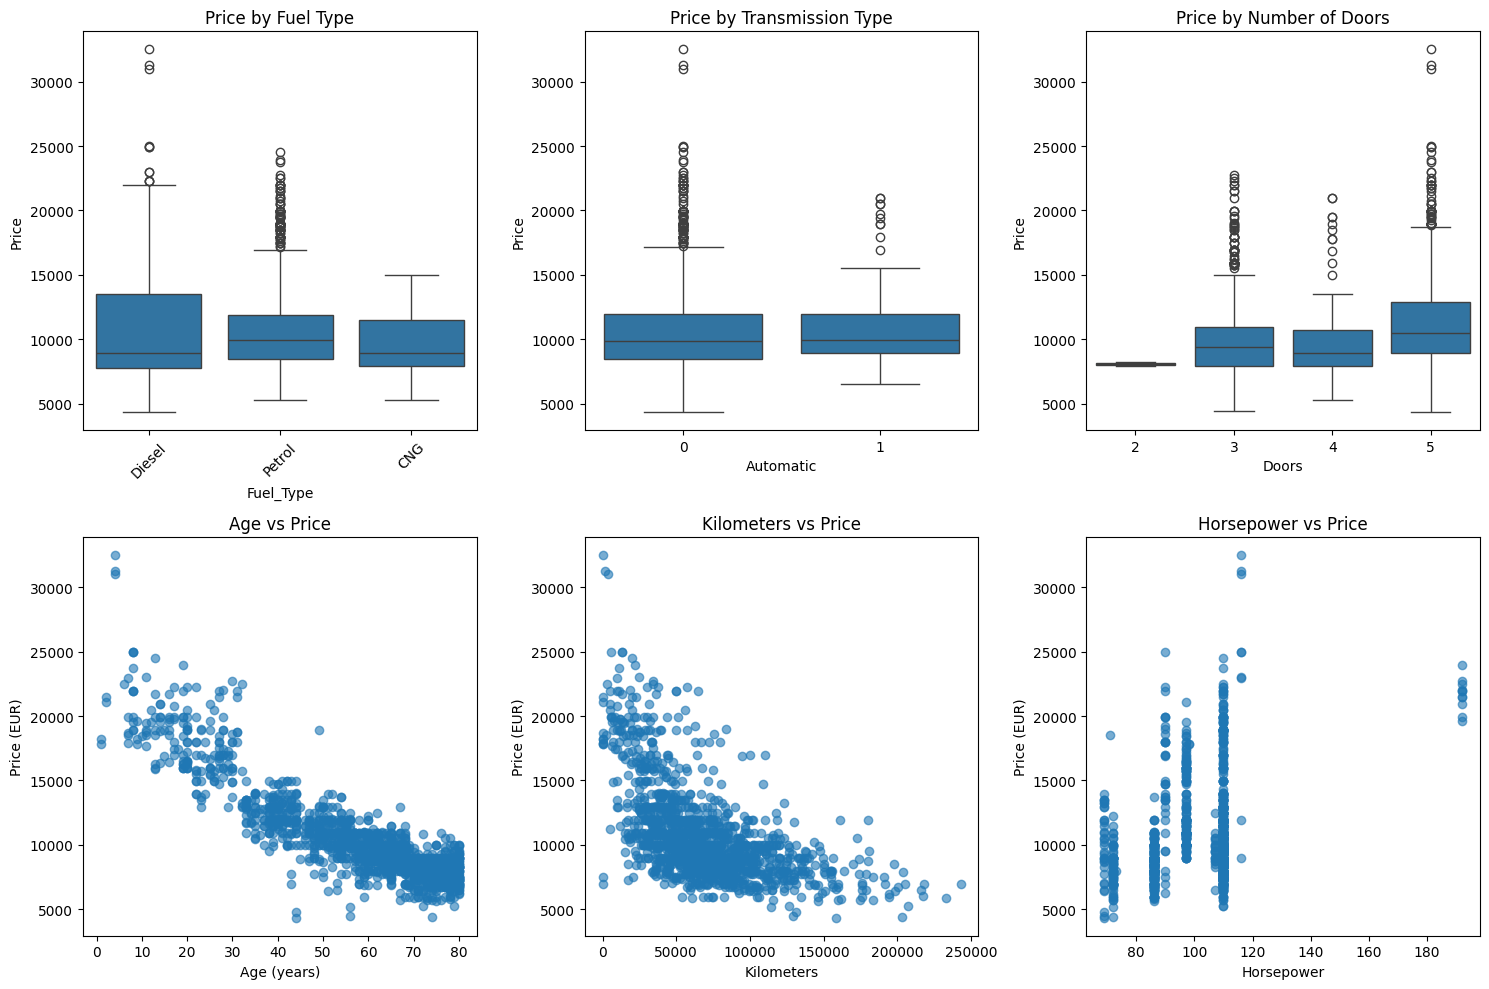

In [8]:
plt.figure(figsize=(15, 10))

# Fuel Type vs Price
plt.subplot(2, 3, 1)
sns.boxplot(data=data, x='Fuel_Type', y='Price')
plt.title('Price by Fuel Type')
plt.xticks(rotation=45)

# Automatic vs Price
plt.subplot(2, 3, 2)
sns.boxplot(data=data, x='Automatic', y='Price')
plt.title('Price by Transmission Type')

# Doors vs Price
plt.subplot(2, 3, 3)
sns.boxplot(data=data, x='Doors', y='Price')
plt.title('Price by Number of Doors')

# Age vs Price
plt.subplot(2, 3, 4)
plt.scatter(data['Age_08_04'], data['Price'], alpha=0.6)
plt.title('Age vs Price')
plt.xlabel('Age (years)')
plt.ylabel('Price (EUR)')

# KM vs Price
plt.subplot(2, 3, 5)
plt.scatter(data['KM'], data['Price'], alpha=0.6)
plt.title('Kilometers vs Price')
plt.xlabel('Kilometers')
plt.ylabel('Price (EUR)')

# HP vs Price
plt.subplot(2, 3, 6)
plt.scatter(data['HP'], data['Price'], alpha=0.6)
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price (EUR)')

plt.tight_layout()
plt.show()

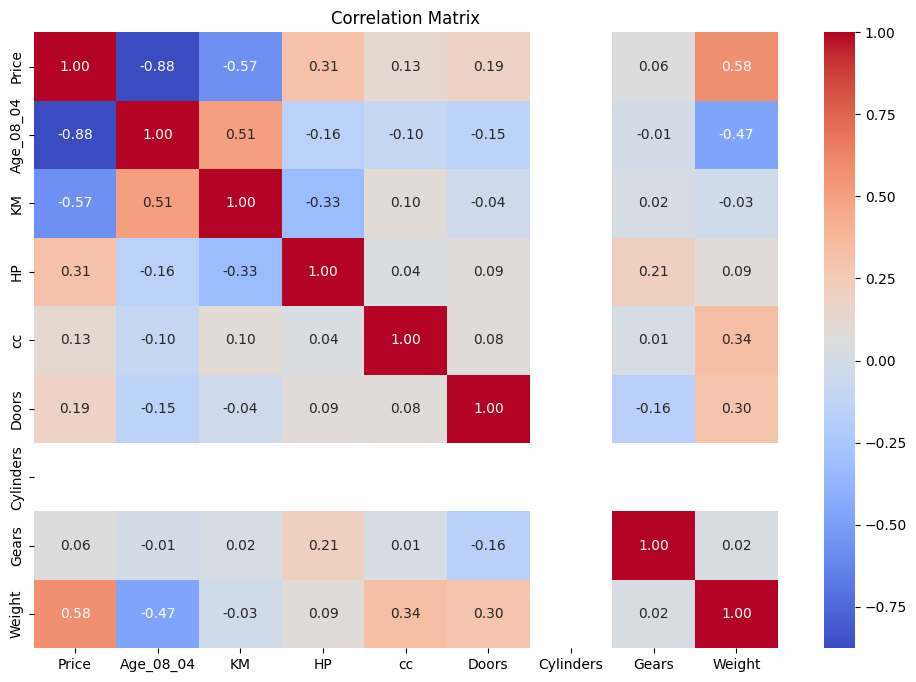

In [9]:
# correlation analysis
numerical_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
dp = data.copy()

# Label Encoding for Fuel_Type
le = LabelEncoder()
dp['Fuel_Type_encoded'] = le.fit_transform(dp['Fuel_Type'])
dp.drop(['Fuel_Type'], axis=1, inplace=True)
dp

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_encoded
0,13500,23,46986,90,0,2000,3,4,5,1165,1
1,13750,23,72937,90,0,2000,3,4,5,1165,1
2,13950,24,41711,90,0,2000,3,4,5,1165,1
3,14950,26,48000,90,0,2000,3,4,5,1165,1
4,13750,30,38500,90,0,2000,3,4,5,1170,1
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,2
1432,10845,72,19000,86,0,1300,3,4,5,1015,2
1433,8500,71,17016,86,0,1300,3,4,5,1015,2
1434,7250,70,16916,86,0,1300,3,4,5,1015,2


In [11]:
# outlier detection 


key_vars = ['Price', 'Age_08_04', 'KM', 'HP']
for var in key_vars:
    Q1 = dp[var].quantile(0.25)
    Q3 = dp[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dp[(dp[var] < lower_bound) | (dp[var] > upper_bound)]
    print(f"{var}: {len(outliers)} outliers (bounds: {lower_bound:.2f} - {upper_bound:.2f})")


Price: 110 outliers (bounds: 3200.00 - 17200.00)
Age_08_04: 7 outliers (bounds: 5.00 - 109.00)
KM: 49 outliers (bounds: -23031.12 - 153051.88)
HP: 11 outliers (bounds: 60.00 - 140.00)


In [12]:
X = dp.drop(['Price'], axis=1)
y = dp['Price']

In [13]:
# 2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.
# Model 1: Standard Linear Regression

model1 = LinearRegression()
model1.fit(X_train, y_train)

# Make predictions
y_pred1 = model1.predict(X_test)
y_pred1_train = model1.predict(X_train)

# Model coefficients and interpretation
coefficients1 = pd.DataFrame({'Feature': X.columns,'Coefficient': model1.coef_,'Abs_Coefficient': abs(model1.coef_)})

print(f"Intercept: {model1.intercept_:.2f}")
print("\n Coefficients:")
print(coefficients1.round(3))

# print accuracy 
print('accuracy on training data:', model1.score(X_train, y_train))
print('accuracy on test data:', model1.score(X_test, y_test))

Intercept: -12636.28

 Coefficients:
             Feature  Coefficient  Abs_Coefficient
0          Age_08_04     -121.436          121.436
1                 KM       -0.017            0.017
2                 HP       20.658           20.658
3          Automatic      245.197          245.197
4                 cc       -0.074            0.074
5              Doors      -36.280           36.280
6          Cylinders       -0.000            0.000
7              Gears      530.282          530.282
8             Weight       23.511           23.511
9  Fuel_Type_encoded      862.056          862.056
accuracy on training data: 0.8695032279244472
accuracy on test data: 0.8428476112018006


In [15]:
# Model 2: Support Vector Regression
from sklearn.svm import SVR
model2 = SVR(kernel='linear')
model2.fit(X_train, y_train)
# Make predictions
y_pred2 = model2.predict(X_test)
y_pred2_train = model2.predict(X_train)

# Model coefficients and interpretation
# coef_ for a linear SVR is usually shape (1, n_features) — flatten to 1D
coef = model2.coef_.ravel() if hasattr(model2, 'coef_') else np.zeros(X.shape[1])
coefficients2 = pd.DataFrame({
	'Feature': X.columns,
	'Coefficient': coef,
	'Abs_Coefficient': np.abs(coef)
})

# intercept_ can be an ndarray; convert to a scalar before formatting
intercept_val = float(np.asarray(model2.intercept_).ravel()[0])
print(f"Intercept: {intercept_val:.2f}")
print("\n Coefficients:")
print(coefficients2.round(3))

# print accuracy
print('accuracy on training data:', model2.score(X_train, y_train))
print('accuracy on test data:', model2.score(X_test, y_test))


Intercept: -12241.43

 Coefficients:
             Feature  Coefficient  Abs_Coefficient
0          Age_08_04     -105.455          105.455
1                 KM       -0.030            0.030
2                 HP       16.262           16.262
3          Automatic       13.672           13.672
4                 cc       -0.171            0.171
5              Doors      -26.952           26.952
6          Cylinders       -0.000            0.000
7              Gears        6.000            6.000
8             Weight       27.276           27.276
9  Fuel_Type_encoded       31.793           31.793
accuracy on training data: 0.8470038908412392
accuracy on test data: 0.8192836827809389


In [16]:
# Model 3: Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(random_state=42)
model3.fit(X_train, y_train)

# Make predictions
y_pred3 = model3.predict(X_test)
y_pred3_train = model3.predict(X_train)

# Model coefficients and interpretation
# Decision Trees do not have coefficients like linear models.

# print accuracy
print('accuracy on training data:', model3.score(X_train, y_train))
print('accuracy on test data:', model3.score(X_test, y_test))

accuracy on training data: 1.0
accuracy on test data: 0.8667424328834824


In [17]:
# Model 4: Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(max_samples=0.6, max_features=0.7,n_estimators=300,random_state=100,max_depth=7)
model4.fit(X_train, y_train)
# Make predictions
y_pred4 = model4.predict(X_test)
y_pred4_train = model4.predict(X_train)

# Model coefficients and interpretation
# Random Forests do not have coefficients like linear models.

# print accuracy
print('accuracy on training data:', model4.score(X_train, y_train))
print('accuracy on test data:', model4.score(X_test, y_test))

accuracy on training data: 0.9439135885291414
accuracy on test data: 0.9209863437224398


In [18]:
# Model 5: Bagging Regressor
from sklearn.ensemble import BaggingRegressor
model5 = BaggingRegressor(max_samples=0.6, max_features=0.7, n_estimators=300, random_state=100)
model5.fit(X_train, y_train)
# Make predictions
y_pred5 = model5.predict(X_test)
y_pred5_train = model5.predict(X_train)

# Model coefficients and interpretation
# Bagging Regressors do not have coefficients like linear models.

# print accuracy
print('accuracy on training data:', model5.score(X_train, y_train))
print('accuracy on test data:', model5.score(X_test, y_test))

accuracy on training data: 0.9631260859969513
accuracy on test data: 0.9133767411510365


In [19]:
# Model 6: Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model6 = GradientBoostingRegressor(max_features=0.7,n_estimators=300,learning_rate=0.1)
model6.fit(X_train, y_train)
# Make predictions
y_pred6 = model6.predict(X_test)
y_pred6_train = model6.predict(X_train)

# Model coefficients and interpretation
# Gradient Boosting Regressors do not have coefficients like linear models.
# print accuracy
# model.score expects (X, y)
print('accuracy on training data:', model6.score(X_train, y_train))
print('accuracy on test data:', model6.score(X_test, y_test))

accuracy on training data: 0.9642410475324686
accuracy on test data: 0.9261215127563835


In [20]:
# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
def evaluate_model(y_true, y_pred, model, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Evaluation Metrics for {model}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("-" * 40)
    print('accuracy on training data:', model_name.score(X_train, y_train))
    print('accuracy on test data:', model_name.score(X_test, y_test))
    print("=" * 50)

model = {'Linear Regression': model1,
         'Support Vector Regression': model2,
         'Decision Tree Regression': model3,
         'Random Forest Regression': model4,
         'Bagging Regressor': model5,
         'Gradient Boosting Regressor': model6}

for name, model_name in model.items():
    if name == 'Linear Regression':
        y_pred = y_pred1
    elif name == 'Support Vector Regression':
        y_pred = y_pred2
    elif name == 'Decision Tree Regression':
        y_pred = y_pred3
    elif name == 'Random Forest Regression':
        y_pred = y_pred4
    elif name == 'Bagging Regressor':
        y_pred = y_pred5
    elif name == 'Gradient Boosting Regressor':
        y_pred = y_pred6
    evaluate_model(y_test, y_pred, name, model_name=model_name)


Evaluation Metrics for Linear Regression:
Mean Squared Error (MSE): 2096851.14
Root Mean Squared Error (RMSE): 1448.05
Mean Absolute Error (MAE): 992.90
R-squared (R²): 0.84
----------------------------------------
accuracy on training data: 0.8695032279244472
accuracy on test data: 0.8428476112018006
Evaluation Metrics for Support Vector Regression:
Mean Squared Error (MSE): 2411259.66
Root Mean Squared Error (RMSE): 1552.82
Mean Absolute Error (MAE): 1055.89
R-squared (R²): 0.82
----------------------------------------
accuracy on training data: 0.8470038908412392
accuracy on test data: 0.8192836827809389
Evaluation Metrics for Decision Tree Regression:
Mean Squared Error (MSE): 1778027.58
Root Mean Squared Error (RMSE): 1333.43
Mean Absolute Error (MAE): 998.61
R-squared (R²): 0.87
----------------------------------------
accuracy on training data: 1.0
accuracy on test data: 0.8667424328834824
Evaluation Metrics for Random Forest Regression:
Mean Squared Error (MSE): 1054262.53
Root

#### By looking all the evaluation metrics and accuracies, the Random Forest Regressor and Gradient Boosting Regressor, seem to perform the best for this dataset.

In [21]:
# 5.Apply Lasso and Ridge methods on the model.
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
# Make predictions
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
# Evaluate Lasso Regression
print("Lasso Regression Evaluation:")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression", model_name=lasso)
# Evaluate Ridge Regression
print("Ridge Regression Evaluation:")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression", model_name=ridge)




Lasso Regression Evaluation:
Evaluation Metrics for Lasso Regression:
Mean Squared Error (MSE): 2096722.18
Root Mean Squared Error (RMSE): 1448.01
Mean Absolute Error (MAE): 992.90
R-squared (R²): 0.84
----------------------------------------
accuracy on training data: 0.8695031809236254
accuracy on test data: 0.8428572762935608
Ridge Regression Evaluation:
Evaluation Metrics for Ridge Regression:
Mean Squared Error (MSE): 2095305.82
Root Mean Squared Error (RMSE): 1447.52
Mean Absolute Error (MAE): 992.87
R-squared (R²): 0.84
----------------------------------------
accuracy on training data: 0.8695021567791126
accuracy on test data: 0.842963428230191


1. What is Normalization & Standardization and how is it helpful?
- Ans. Normalization and Standardization are techniques used to scale numerical features in a dataset.
    * Normalization (Min-Max Scaling) transforms features to a fixed range, usually [0, 1]. 
        - Formula for Normalization(X norm) = (X - X min)/(X max - X min)
            - where X = Original Value which will normalized
            - X min = The minimum value in the dataset. 
            - X max = The maximum value in the dataset
    * Standardization (Z-score Scaling) transforms features to have a mean of 0 and a standard deviation of 1, the range is in between -3 and 3 These techniques are helpful because they ensure that all features contribute equally to the model's learning process such as all the value are on the same scale, especially for algorithms sensitive to feature scales, such as gradient descent-based methods. 
        - Formula for Standardization(Z) = (X - mu)/sigma
            - where X = data point
            - mu = mean of data
            - sigma = Standard deviation of the data

2. What techniques can be used to address multicollinearity in multiple linear regression?
- Ans. Techniques to address multicollinearity in multiple linear regression include:
    - Remove highly correlated variables based on correlation matrix.
    - VIF (Variance Inflation Factor) analysis. Remove variables with high VIF values. 
        - VIF < 5 is no multicollinearity
        - VIF > 5-10 is Slightly multicollinearity but acceptable
        - VIF > 10 is High multicollinearity present hence such model can be rejected.
    - Then evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.